In [1]:
%matplotlib notebook
from IPython.display import display
from IPython.html import widgets
from scripts.open_hdf5 import *
from scripts.xas_tool import *

C:\Program Files\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
C:\Program Files\Anaconda2\lib\site-packages\matplotlib\__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
file_directory = get_abs_path("data/spectra_example.hdf5")
print file_directory

C:\Users\hanr\GitHub\SGM-Beamline\data/spectra_example.hdf5


In [3]:
energy_array, mca_array, scaler_array, scan_num = read_hdf5(file_directory)

scan  S1 is: cscan
scan  S10 is: cscan
scan  S2 is: cscan
scan  S3 is: cscan
scan  S4 is: cscan
scan  S5 is: cscan
scan  S6 is: cscan
scan  S7 is: cscan
scan  S8 is: cscan
scan  S9 is: cscan


pfy length:  10


<IPython.core.display.Javascript object>


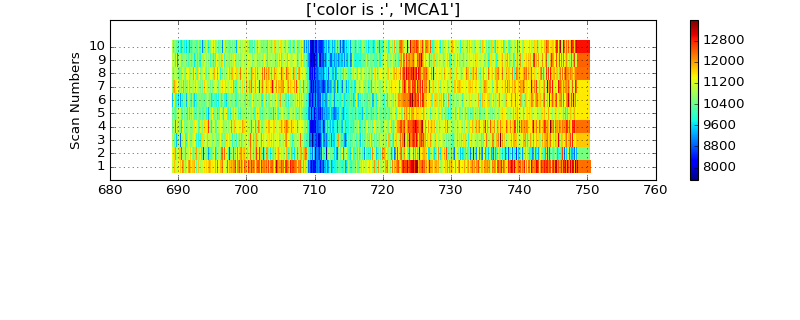

Generated plot for No. 1 in c scan array.  Real scan number is: S1
pfy length:  10
Generated plot for No. 2 in c scan array.  Real scan number is: S10
pfy length:  10
Generated plot for No. 3 in c scan array.  Real scan number is: S2
pfy length:  10
Generated plot for No. 4 in c scan array.  Real scan number is: S3
pfy length:  10
Generated plot for No. 5 in c scan array.  Real scan number is: S4
pfy length:  10
Generated plot for No. 6 in c scan array.  Real scan number is: S5
pfy length:  10
Generated plot for No. 7 in c scan array.  Real scan number is: S6
pfy length:  10
Generated plot for No. 8 in c scan array.  Real scan number is: S7
pfy length:  10
Generated plot for No. 9 in c scan array.  Real scan number is: S8
pfy length:  10
Generated plot for No. 10 in c scan array.  Real scan number is: S9


In [4]:
matplotlib.rcParams['figure.figsize'] = (10, 4)
index_of_scan_num = summary_plot_hdf5(energy_array, mca_array, scan_num, "PFY_SDD1")

<IPython.core.display.Javascript object>


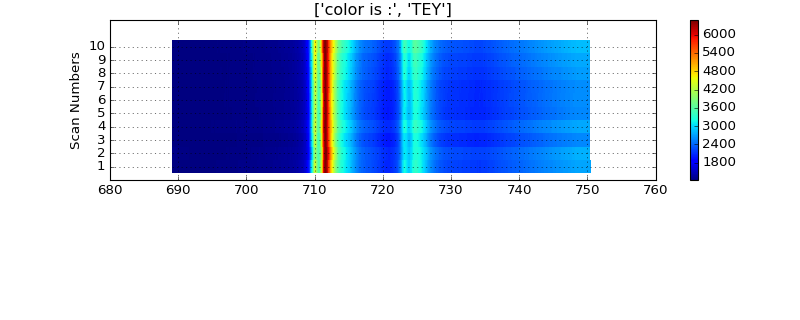

Generated plot for No. 1 in c scan array.  Real scan number is: S1
Generated plot for No. 2 in c scan array.  Real scan number is: S10
Generated plot for No. 3 in c scan array.  Real scan number is: S2
Generated plot for No. 4 in c scan array.  Real scan number is: S3
Generated plot for No. 5 in c scan array.  Real scan number is: S4
Generated plot for No. 6 in c scan array.  Real scan number is: S5
Generated plot for No. 7 in c scan array.  Real scan number is: S6
Generated plot for No. 8 in c scan array.  Real scan number is: S7
Generated plot for No. 9 in c scan array.  Real scan number is: S8
Generated plot for No. 10 in c scan array.  Real scan number is: S9


In [5]:
matplotlib.rcParams['figure.figsize'] = (10, 4)
index_of_scan_num = summary_plot_hdf5(energy_array, scaler_array, scan_num, "TEY")

In [6]:
inputText = widgets.Text() 
def generate_array(sender):
	print inputText.value
inputText.on_submit(generate_array)
inputText

S8


In [7]:
bad_scan = inputText.value
good_scan = generate_good_scan_index(scan_num, bad_scan)
print good_scan

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
removed S8
[1, 2, 3, 4, 5, 6, 7, 8, 10]


In [8]:
bins = 600
temp_array = prepare_bin_plot_hdf5 (good_scan, energy_array, mca_array, scaler_array, 690, 750, bins, 60, 80)
mean_energy_array = temp_array[0]
sdd_bin_data = temp_array[1]
scaler_bin_data = temp_array[2]
pfy_bin_data = temp_array[3]

Total good scan numbers: 9
Start creating bins
Number of Bins: 600
Number of Edges: 601
Energy range is:  690 - 750
created bins completed.

The width of a bin is: 0.1
Start assigning data points into bins
Assign data points completed
Start calcualting average of SDD1(MCA1), SDD2(MCA2), SDD3(MCA3) & SDD4(MCA4)...
No data point is in Bin No. 597 . Average calculation is not necessary
No data point is in Bin No. 598 . Average calculation is not necessary
No data point is in Bin No. 599 . Average calculation is not necessary
No data point is in Bin No. 600 . Average calculation is not necessary
Calculation completed.

Start calcualting Average of I0, TEY & Diode...
No data point is in Bin No. 597 . Average calculation is not necessary
No data point is in Bin No. 598 . Average calculation is not necessary
No data point is in Bin No. 599 . Average calculation is not necessary
No data point is in Bin No. 600 . Average calculation is not necessary
Calculation completed.

Getting PFY ROIs


Plotting average XAS.


<IPython.core.display.Javascript object>


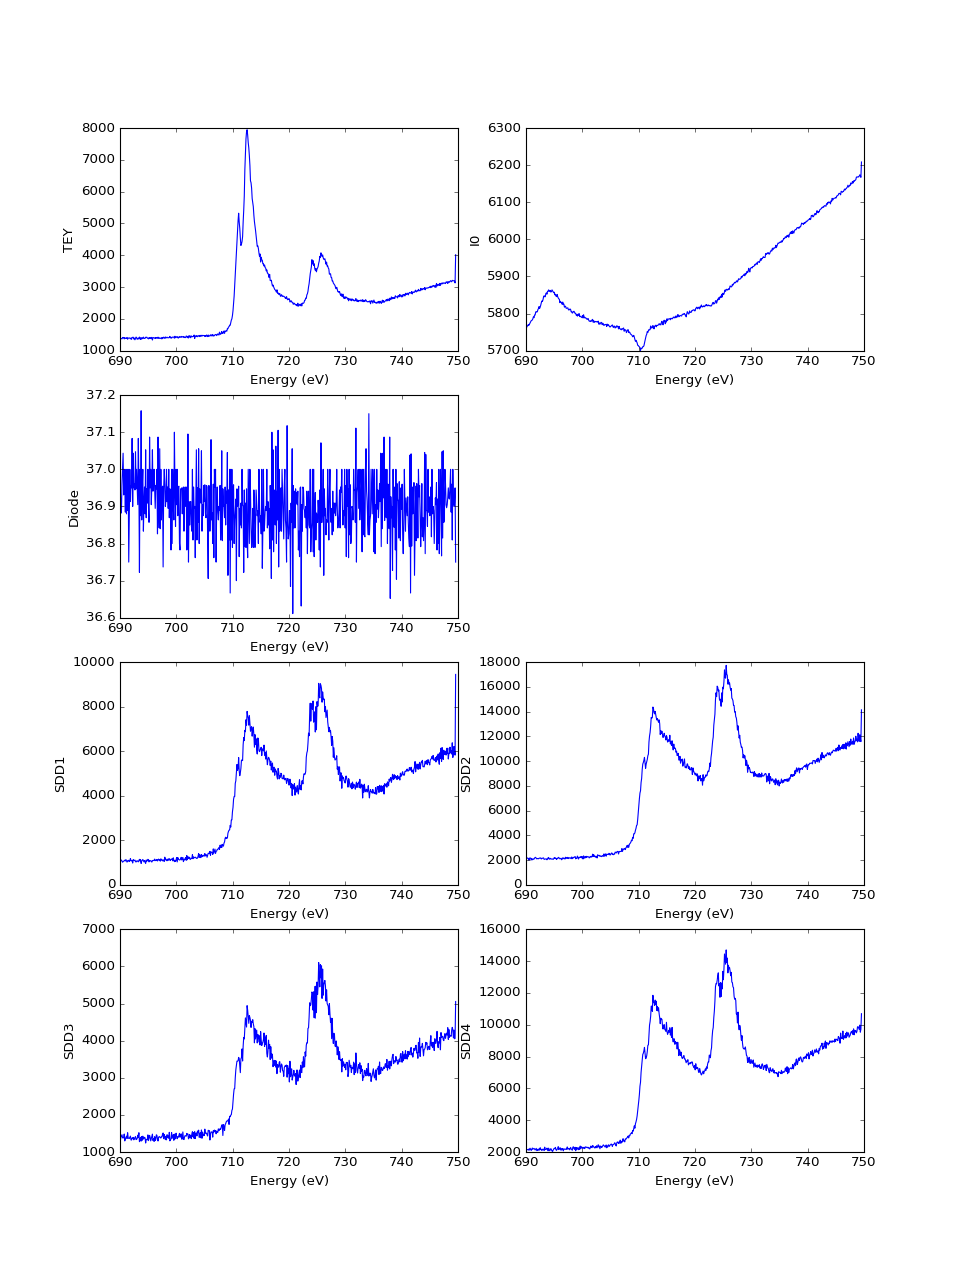

In [9]:
matplotlib.rcParams['figure.figsize'] = (12, 16)
plot_bin_xas_all(mean_energy_array, scaler_bin_data, pfy_bin_data)